# Task 1

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\imane\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [9]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [10]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Flight mainly let down by ...
1,✅ Trip Verified | Another awful experience b...
2,"✅ Trip Verified | The service was rude, full..."
3,✅ Trip Verified | This flight was a joke. Th...
4,✅ Trip Verified | This time British Airways ...


In [11]:
df.shape

(1000, 1)

In [12]:
df.to_csv("BA_reviews.csv")

In [13]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    # removing trip verified
    text = re.sub(r"^✅ Trip Verified \|", "", text).strip()
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    words = word_tokenize(text)
    # Remove stop words
    words = [word for word in words if word.lower() not in stop_words]
    # Stem words
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)

In [14]:
cleaned_reviews = [clean_text(review) for review in reviews]
print(cleaned_reviews)

["flight mainly let disagreeable flight attendant . queue check cape town - good . however checkin agent unfamiliar ba size weight rule sport bag wait 10 minute phone call made -- annoying . lounge good . gate service excellent organised queue . seat good ( new upgraded club suite ) . zip broke amenity kit unusable -- ba cutting corner much . offered cocktail service came promptly drink excellent . nut ! went galley ask nut snack go . spoke male flight attendant looked utter distaste temerity ask nut . said `` come ? '' . bizarre question . said `` seat 8e '' responded flick hand - `` go ask , 's serving . '' stunned - treated way even cheapest restaurant , let alone business class premium airline . gentleman concerned place service hospitality find different line work . anyway , food good . ife worked fine . wifi n't working . managed 6.5 hour sleep got plane promptly despite remote stand , requiring bus . luggage took quite arrive . overall 7/10 . would 9/10 rude staff member .", 'an

In [15]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# getting the sentiment for each review
sentiments = [get_sentiment(review) for review in cleaned_reviews]
print(sentiments)

[0.22474747474747478, -0.31999999999999995, -0.09583333333333334, -0.45, 0.36337535014005606, 0.19999999999999998, 0.051178451178451184, -0.09904761904761905, 0.03865800865800867, 0.1677777777777778, 0.3527777777777778, -0.6666666666666666, 0.2865259740259741, 0.3142857142857142, 0.1375, 0.04305555555555555, -0.06666666666666667, -0.30833333333333335, -0.05643939393939395, 0.044346590909090905, 0.2062661498708011, 0.0761904761904762, -0.022435897435897426, -0.016547619047619044, 0.1663377192982456, 0.11645454545454545, 0.010937500000000027, 0.059999999999999984, -0.10238095238095239, 0.007738095238095243, -0.175, 0.008928571428571421, 0.4444805194805195, -0.07373737373737373, -0.05372960372960373, -0.016666666666666666, 0.11666666666666667, 0.13636363636363635, 0.09374999999999999, 0.25967948717948725, -0.03392676767676769, 0.06388888888888888, 0.1572916666666667, 0.01715151515151515, 0.3, 0.011607142857142863, 0.14791666666666667, -0.057539682539682536, 0.02391774891774892, 0.0, 0.008

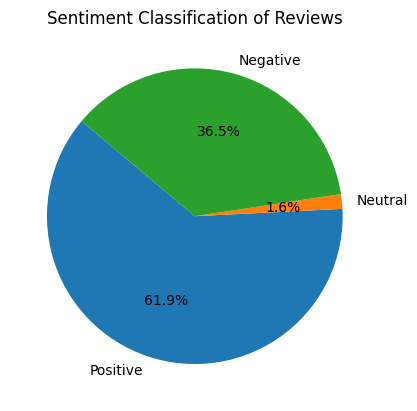

In [16]:
# Classifying reviews based on sentiment polarity
sentiment_classes = ['Positive' if s > 0 else 'Neutral' if s == 0 else 'Negative' for s in sentiments]

positive = sentiment_classes.count('Positive')
neutral = sentiment_classes.count('Neutral')
negative = sentiment_classes.count('Negative')

# Create a pie chart
labels = ['Positive', 'Neutral', 'Negative']
sizes = [positive, neutral, negative]
colors = sns.color_palette()

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Classification of Reviews")
plt.show()

In [17]:
print(sizes)

[619, 16, 365]


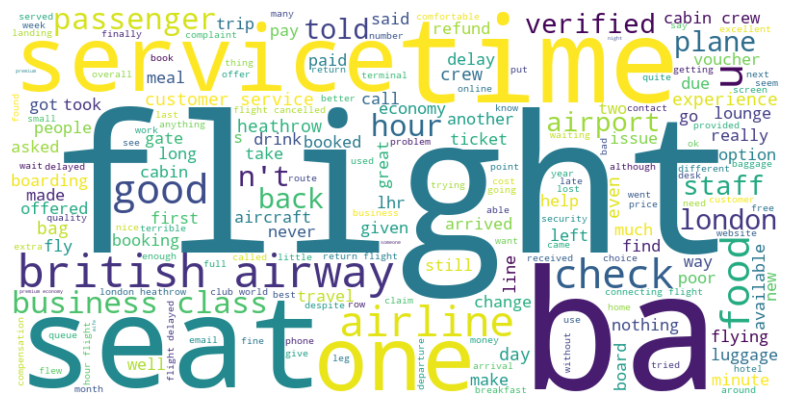

In [18]:
# Joining all cleaned reviews into a single string
all_reviews = ' '.join(cleaned_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()